In [1]:
!pip install tensorflow

C:\Users\bin00\AppData\Local\Temp\ipykernel_13892\633646934.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Training data shape: (3843, 10, 8)
Testing data shape: (961, 10, 8)


C:\Users\bin00\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,801 (487.50 KB)

 Trainable params: 124,289 (485.50 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 453089344.0000 - val_loss: 2363007232.0000
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 444757664.0000 - val_loss: 2362569472.0000
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 444588576.0000 - val_loss: 2361736960.0000
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 454918048.0000 - val_loss: 2360432128.0000
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 450826976.0000 - val_loss: 2358690816.0000
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 445800832.0000 - val_loss: 2358220800.0000
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 449461856.0000 - val_loss: 2355550464.0000
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 441910784.0000 - val_loss: 2352759296.0000
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 443187776.0000 - val_loss: 2350716928.0000
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 434094944.0000 - val_loss: 2347

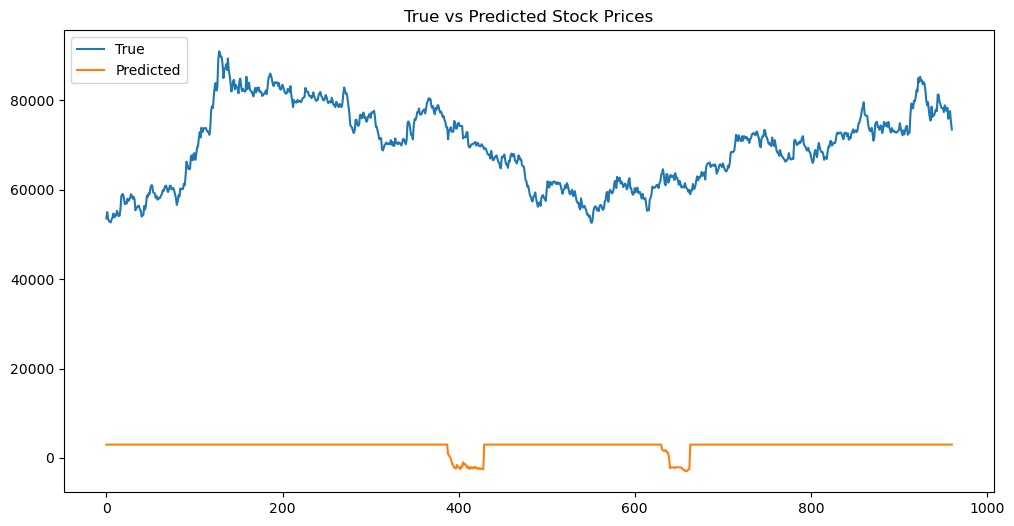

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 데이터 로드
data_path = 'dataset/005930.KS.csv'  # 올바른 파일 경로로 변경
df = pd.read_csv(data_path)

# 날짜 및 시간 변환
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 결측치 처리
df.fillna(method='ffill', inplace=True)

# 필요한 칼럼만 선택
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 지수 이동 평균 (EMA) 추가
df['EMA_15'] = df['Close'].ewm(span=15).mean()
df['EMA_30'] = df['Close'].ewm(span=30).mean()
df['EMA_60'] = df['Close'].ewm(span=60).mean()

# 학습 데이터와 라벨 분리
window_size = 10
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_15', 'EMA_30', 'EMA_60']

X = []
y = []

for i in range(window_size, len(df)):
    X.append(df[features].iloc[i-window_size:i].values)
    y.append(df['Close'].iloc[i])

X = np.array(X)
y = np.array(y)

# 데이터 분할
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# 모델 정의
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.summary()

# 모델 훈련
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=callbacks)

# 모델 로드 및 예측
model.load_weights('best_model.keras')
predictions = model.predict(X_test)

# 평가
mse = np.mean((predictions.flatten() - y_test) ** 2)
print(f'Mean Squared Error: {mse}')

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(predictions.flatten(), label='Predicted')
plt.title('True vs Predicted Stock Prices')
plt.legend()
plt.show()
